## Data preprocessing step 2: data interconnectivity, missing data, outliesrs, scaling, pivoting

In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


BASE_DATA_PATH = r'C:\D\Whitireia\ARP\data'

In [124]:
df_all_stations_filtered = pd.read_csv(os.path.join(BASE_DATA_PATH, r'v2_df_all_stations_filtered.csv'), parse_dates=['date'])
df_all_stations_filtered

,date,station_id,rain,relative_hum,mean_temp,wind
0,2024-01-30 00:00:00+00:00,2592,2.8,90.52,16.50,10.93
1,2024-01-29 00:00:00+00:00,2592,1.0,90.47,16.50,13.76
2,2024-01-28 00:00:00+00:00,2592,2.8,79.11,17.10,7.13
3,2024-01-27 00:00:00+00:00,2592,0.0,58.74,20.30,15.34
4,2024-01-26 00:00:00+00:00,2592,0.6,62.95,17.70,9.49
...,...,...,...,...,...,...
17451,2017-04-30 00:00:00+00:00,41559,9.8,70.00,11.88,7.49
17452,2017-04-29 00:00:00+00:00,41559,20.2,92.75,16.08,2.55
17453,2017-04-28 00:00:00+00:00,41559,1.4,90.43,16.45,3.19
17454,2017-04-27 00:00:00+00:00,41559,0.0,82.42,16.92,4.06


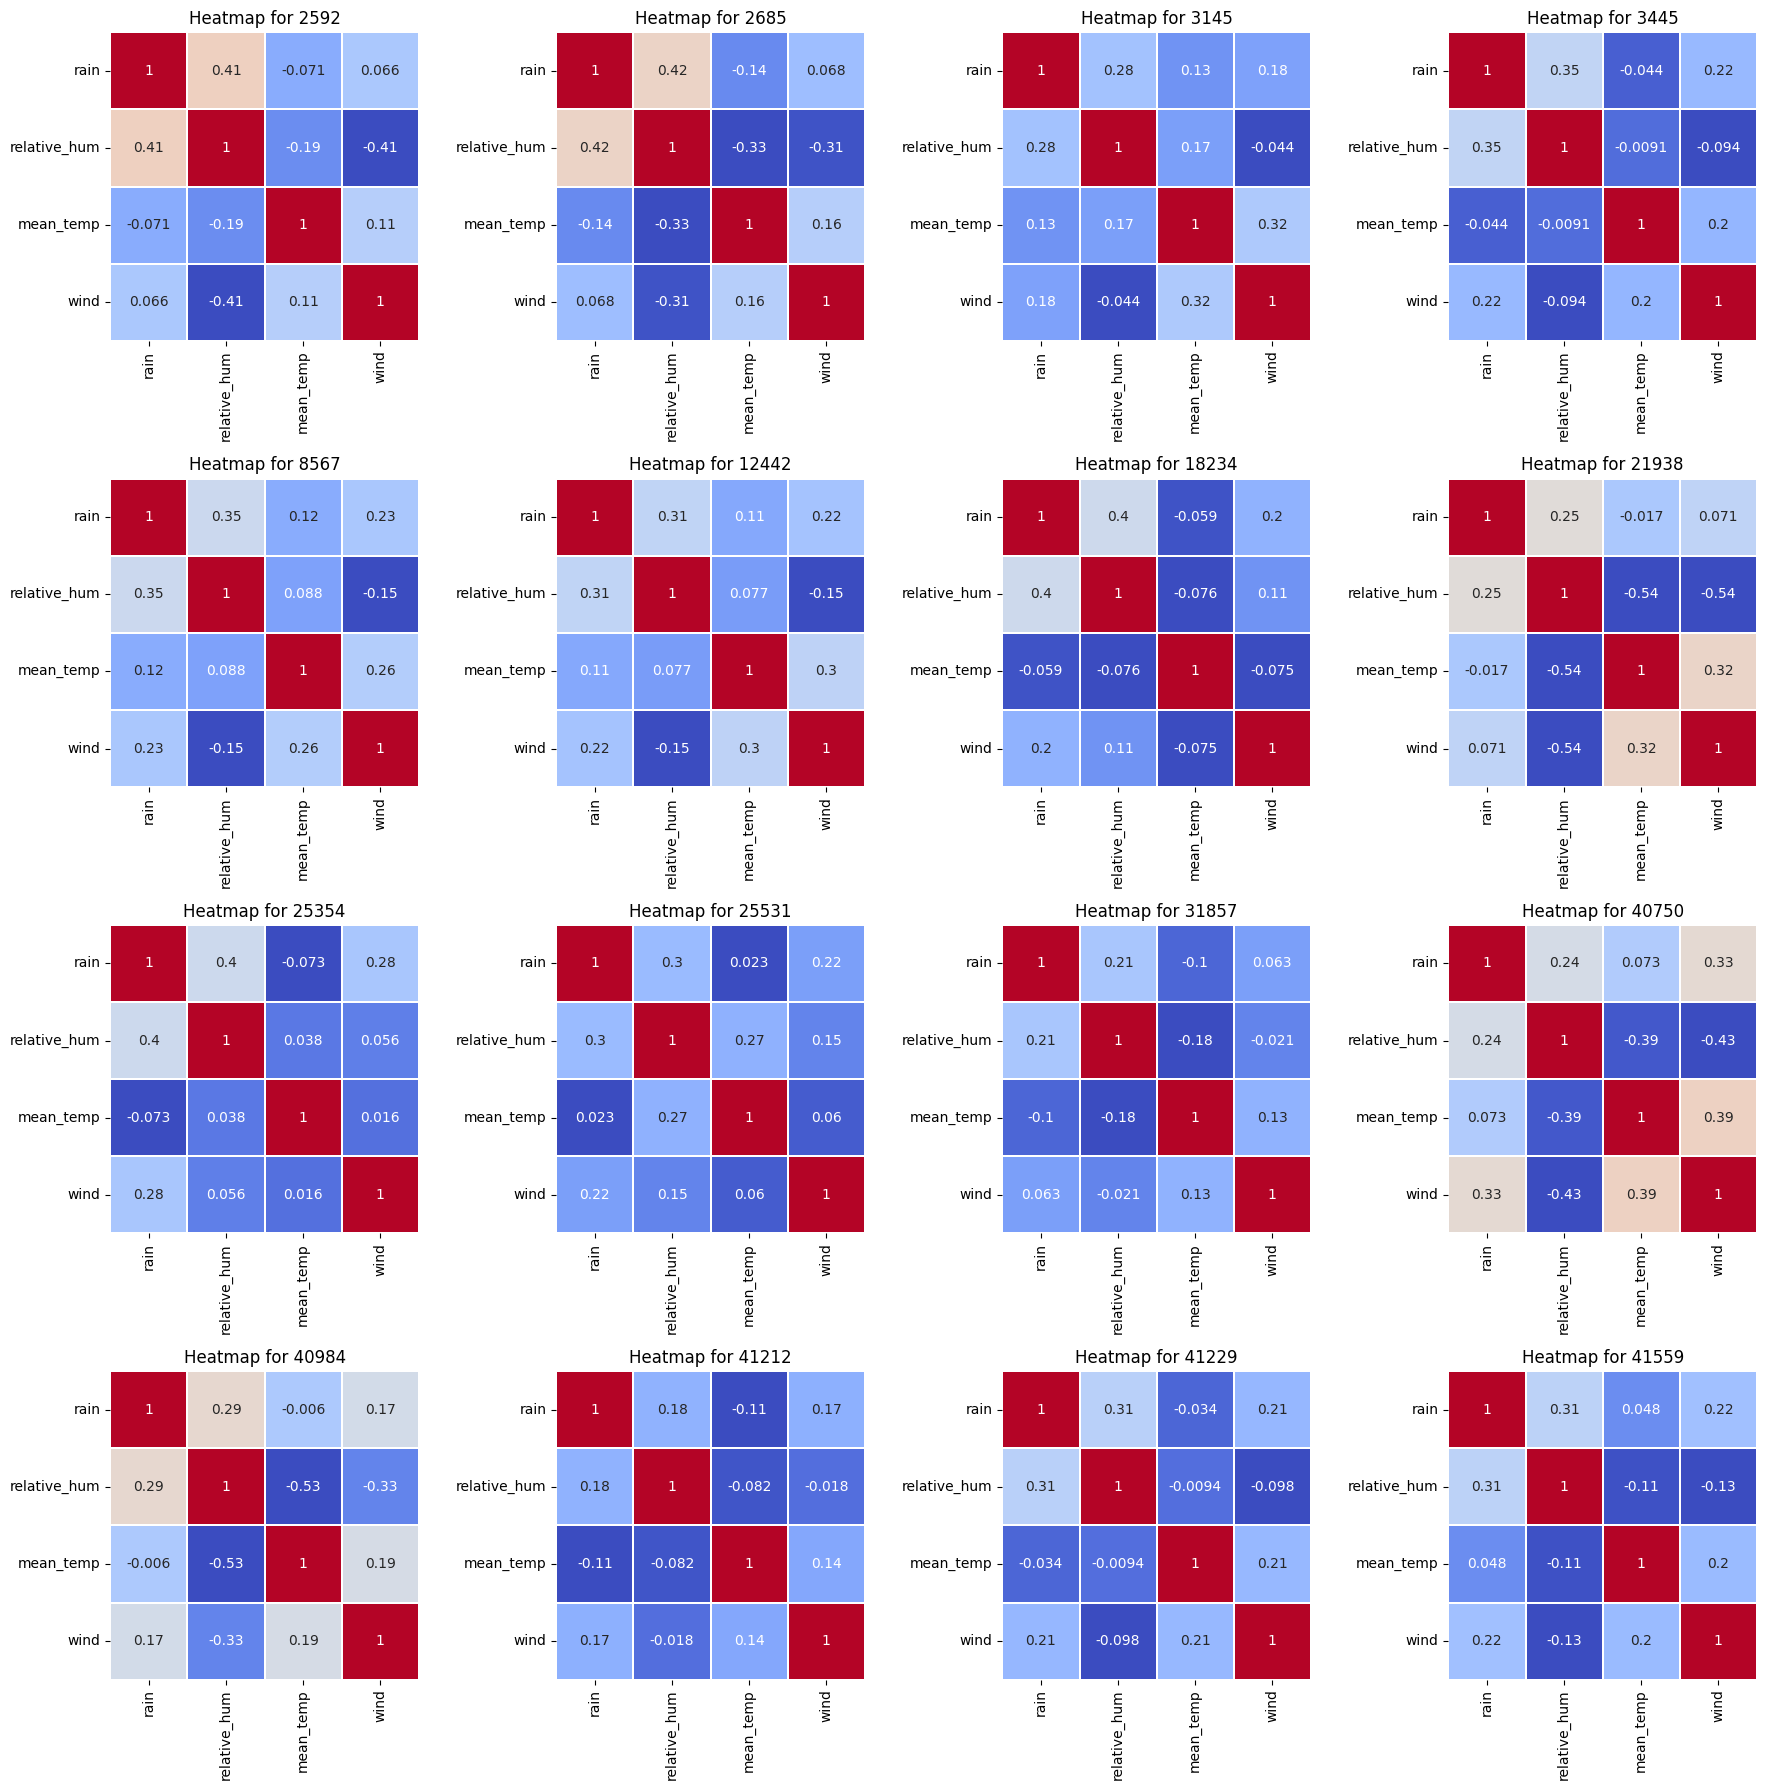

In [125]:
fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()

for i, station_id in enumerate(df_all_stations_filtered['station_id'].unique()):
    flt = df_all_stations_filtered['station_id'] == station_id
    df = df_all_stations_filtered[flt]
    df = df[['rain', 'relative_hum', 'mean_temp', 'wind']]

    corr = df.corr(numeric_only=True)

    sns.heatmap(
    corr,
    ax=axes[i],
    cmap='coolwarm',
    annot=True,
    cbar=False,
    square=True,
    linewidths=0.3,
    )
    axes[i].set_title(f"Heatmap for {station_id}", fontsize=12)
    
plt.tight_layout()
plt.show()

In [126]:
def plot_parameter_over_time_all_stations(df, parameter, stations_to_plot=None, rows_number=None):
    y_feature = {
        'rain': 'mm',
        'relative_hum': '%',
        'mean_temp': '⁰C',
        'wind': 'm/s'
    }

    stations = df['station_id'].unique()
    if stations_to_plot:
        stations = stations_to_plot

    plt.figure(figsize=(16,6))
    for station in stations:
        station_data = df[df['station_id'] == station].iloc[:rows_number]
        plt.plot(station_data['date'], station_data[parameter], label=f'Station {station}')

    plt.xlabel('Date')
    plt.ylabel(y_feature[parameter])
    plt.title(f'{parameter.capitalize()} Over Time by Station')
    plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.grid(True)
    plt.show()

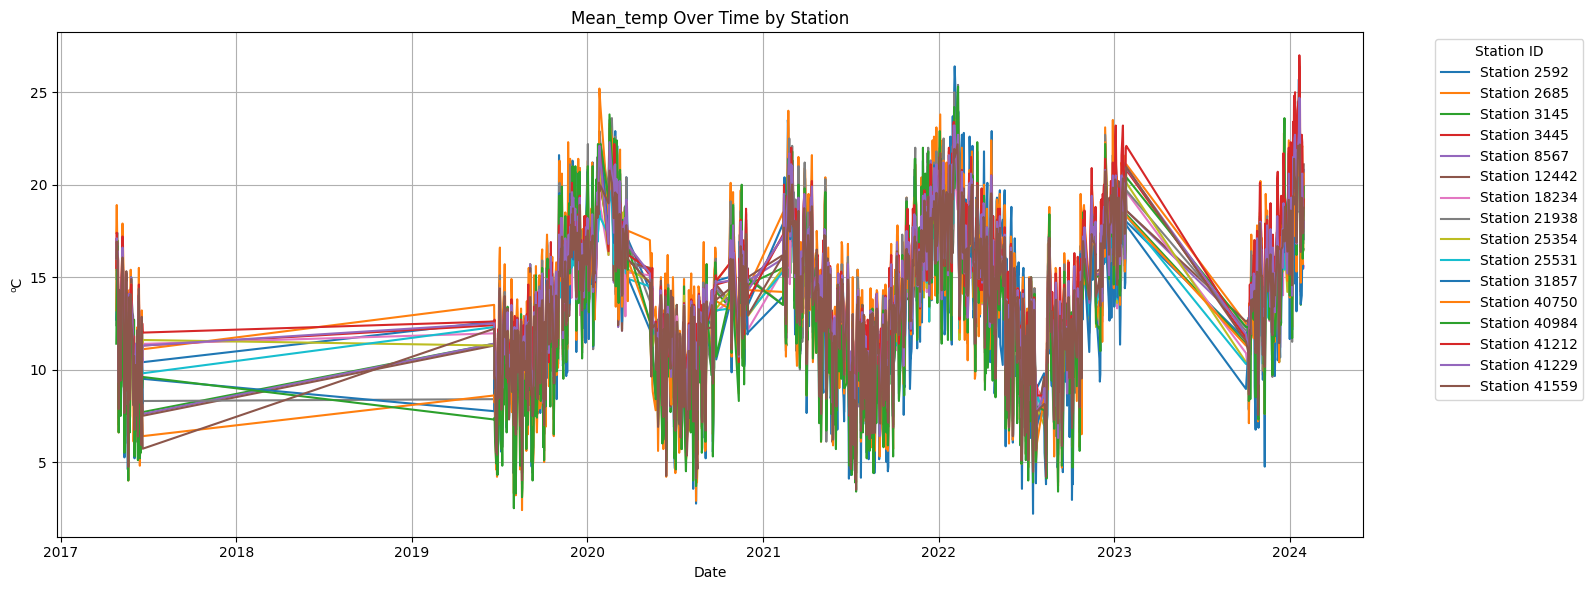

In [127]:
plot_parameter_over_time_all_stations(df_all_stations_filtered, 'mean_temp')

In [128]:
df_all_stations_filtered['year'] = df_all_stations_filtered['date'].dt.year
df_all_stations_filtered['month'] = df_all_stations_filtered['date'].dt.month
# yearly_counts = df_all_stations_filtered['year'].value_counts().sort_index()
monthly_counts = df_all_stations_filtered.groupby(['year', 'month']).size().reset_index(name='row_count')
monthly_counts['percent'] = (monthly_counts['row_count'] / 480 * 100).astype(int)
print(monthly_counts)
display(df_all_stations_filtered)

    year  month  row_count  percent
0   2017      4         80       16
1   2017      5        448       93
2   2017      6        320       66
3   2019      6        144       30
4   2019      7        448       93
5   2019      8        448       93
6   2019      9        480      100
7   2019     10        448       93
8   2019     11        464       96
9   2019     12        432       90
10  2020      1        336       70
11  2020      2        112       23
12  2020      3        288       60
13  2020      5        144       30
14  2020      6        400       83
15  2020      7        384       80
16  2020      8        480      100
17  2020      9        272       56
18  2020     10         96       20
19  2020     11        336       70
20  2021      2        288       60
21  2021      3        464       96
22  2021      4        368       76
23  2021      5        416       86
24  2021      6        400       83
25  2021      7        496      103
26  2021      8        464  

,date,station_id,rain,relative_hum,mean_temp,wind,year,month
0,2024-01-30 00:00:00+00:00,2592,2.8,90.52,16.50,10.93,2024,1
1,2024-01-29 00:00:00+00:00,2592,1.0,90.47,16.50,13.76,2024,1
2,2024-01-28 00:00:00+00:00,2592,2.8,79.11,17.10,7.13,2024,1
3,2024-01-27 00:00:00+00:00,2592,0.0,58.74,20.30,15.34,2024,1
4,2024-01-26 00:00:00+00:00,2592,0.6,62.95,17.70,9.49,2024,1
...,...,...,...,...,...,...,...,...
17451,2017-04-30 00:00:00+00:00,41559,9.8,70.00,11.88,7.49,2017,4
17452,2017-04-29 00:00:00+00:00,41559,20.2,92.75,16.08,2.55,2017,4
17453,2017-04-28 00:00:00+00:00,41559,1.4,90.43,16.45,3.19,2017,4
17454,2017-04-27 00:00:00+00:00,41559,0.0,82.42,16.92,4.06,2017,4


In [129]:
def get_time_period(df: pd.DataFrame, start_date: str, end_date: str) -> pd.DataFrame:
    flt = (df['date'] >= start_date) & (df['date'] <= end_date)
    return df.loc[flt].sort_values(['station_id', 'date'], ascending=[True, False]).reset_index(drop=True)

In [130]:
start_date = '2019-07-01'
# start_date = '2021-02-01'
end_date = '2023-01-31'
df_all_stations_period = get_time_period(df_all_stations_filtered, start_date=start_date, end_date=end_date)
print(df_all_stations_period.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15024 entries, 0 to 15023
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          15024 non-null  datetime64[ns, UTC]
 1   station_id    15024 non-null  int64              
 2   rain          15024 non-null  float64            
 3   relative_hum  15024 non-null  float64            
 4   mean_temp     15024 non-null  float64            
 5   wind          15024 non-null  float64            
 6   year          15024 non-null  int32              
 7   month         15024 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(4), int32(2), int64(1)
memory usage: 821.8 KB
None


In [131]:
df_all_stations_period['year'] = df_all_stations_period['date'].dt.year
df_all_stations_period['month'] = df_all_stations_period['date'].dt.month
monthly_counts = df_all_stations_period.groupby(['year', 'month']).size().reset_index(name='row_count')
print(monthly_counts)
df_all_stations_period.drop(['year', 'month'], axis=1, inplace=True)

    year  month  row_count
0   2019      7        448
1   2019      8        448
2   2019      9        480
3   2019     10        448
4   2019     11        464
5   2019     12        432
6   2020      1        336
7   2020      2        112
8   2020      3        288
9   2020      5        144
10  2020      6        400
11  2020      7        384
12  2020      8        480
13  2020      9        272
14  2020     10         96
15  2020     11        336
16  2021      2        288
17  2021      3        464
18  2021      4        368
19  2021      5        416
20  2021      6        400
21  2021      7        496
22  2021      8        464
23  2021      9        368
24  2021     10        384
25  2021     11        416
26  2021     12        448
27  2022      1        416
28  2022      2        336
29  2022      3        480
30  2022      4        416
31  2022      5        416
32  2022      6        464
33  2022      7        368
34  2022      8        368
35  2022      9        448
3

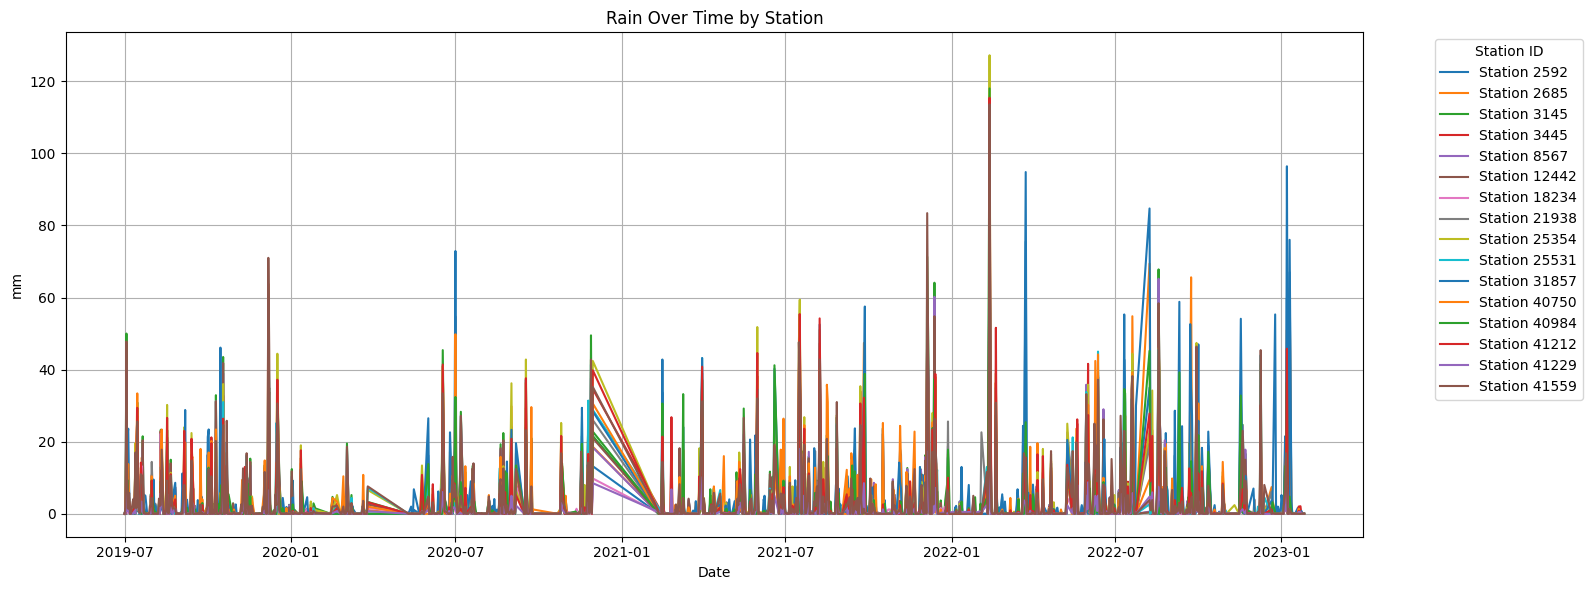

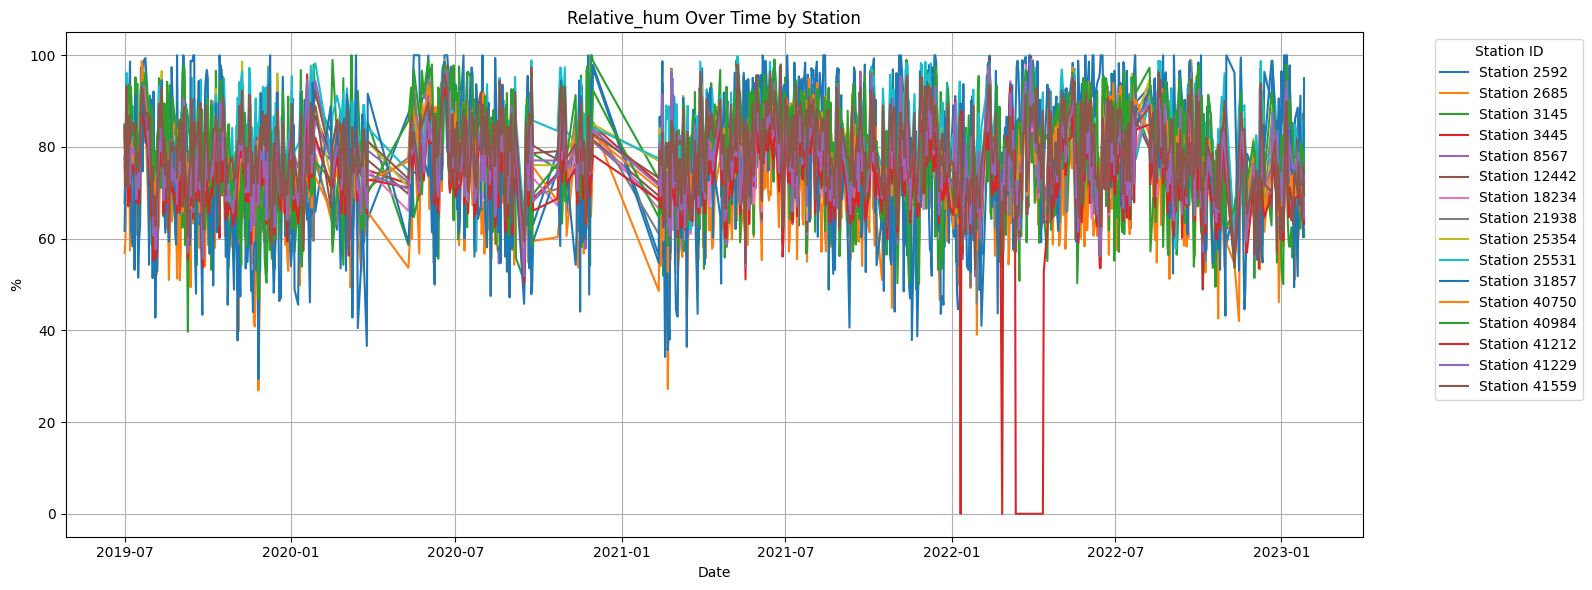

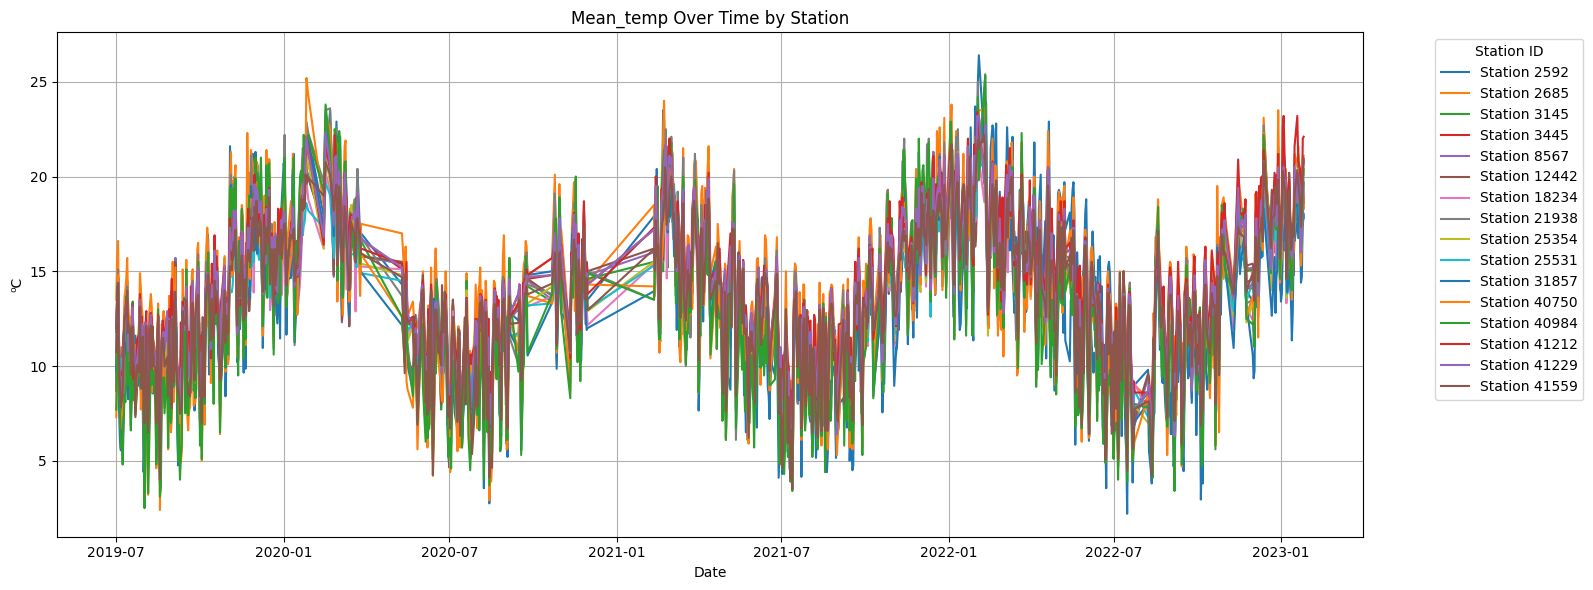

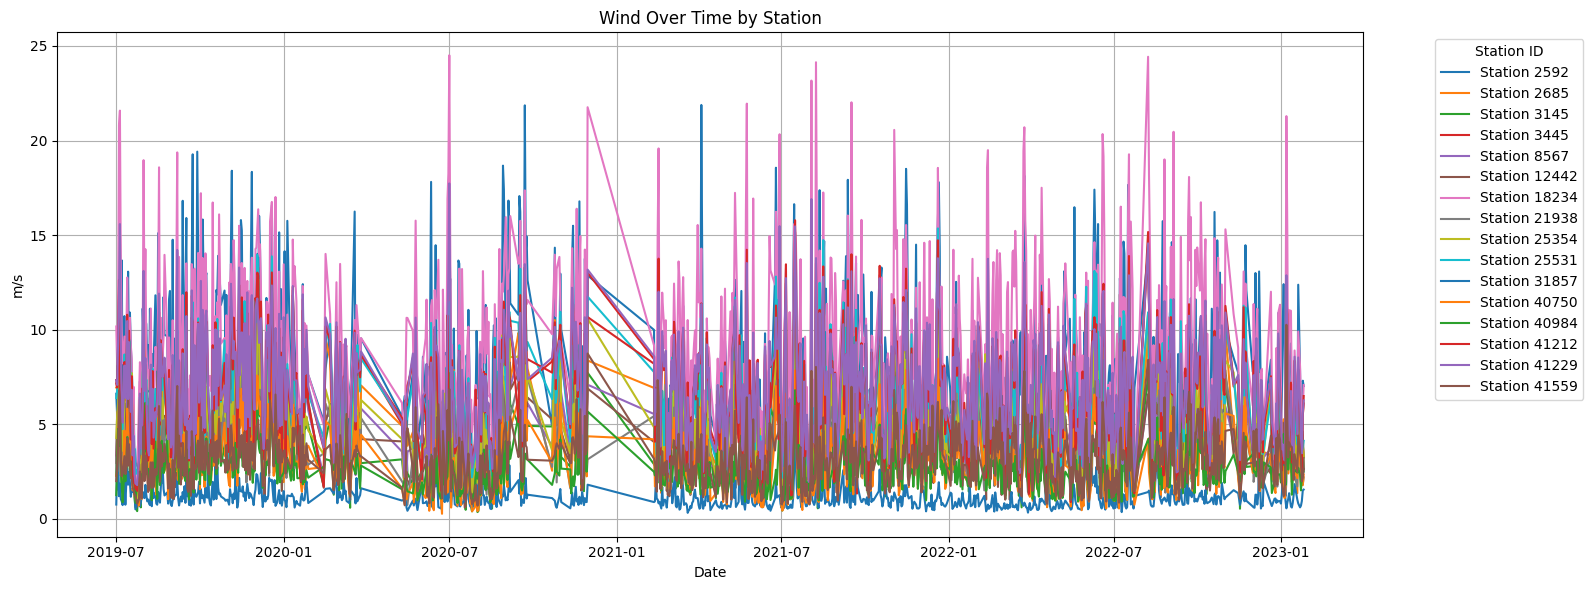

In [132]:
stations_to_plot = [2592, 2685, 3145, 3445, 8567, 12442, 18234, 21938, 25354, 25531, 31857, 40750, 40984, 41212, 41229, 41559]
# stations_to_plot = [8567, 12442, 31857]

parameteres = ['rain', 'relative_hum', 'mean_temp',  'wind']
for parameter in parameteres:
    plot_parameter_over_time_all_stations(df_all_stations_period, parameter=parameter, stations_to_plot=stations_to_plot)


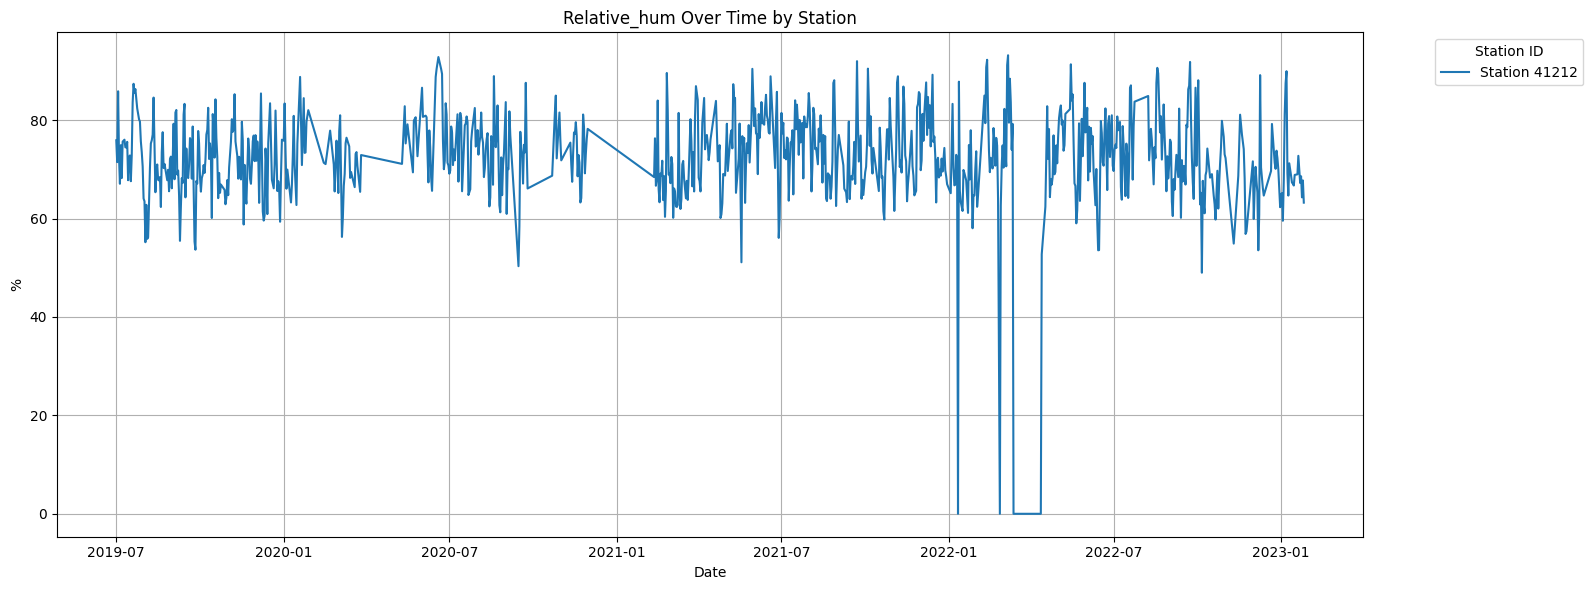

In [133]:
stations_to_plot = [41212]
# stations_to_plot = None
plot_parameter_over_time_all_stations(df_all_stations_period, parameter='relative_hum', stations_to_plot=stations_to_plot)

In [134]:
# first 0 values replaced by NaN
df_all_stations_period['relative_hum'] = df_all_stations_period['relative_hum'].replace({0.0:np.nan})
df_all_stations_period.set_index('date', inplace=True)
print(f"Number incorrect rows: {len(df_all_stations_period[df_all_stations_period['relative_hum'].isna()])}")
display(df_all_stations_period[df_all_stations_period['relative_hum'].isna()].head())

df_all_stations_period['relative_hum'] = df_all_stations_period[['relative_hum']].interpolate(method='time').round(2)
df_all_stations_period.reset_index(inplace=True)
# display(df_all_stations_period.iloc[12426:12507].head(40)[:40])
display(df_all_stations_period)

Number incorrect rows: 31


,station_id,rain,relative_hum,mean_temp,wind
date,,,,,
2022-04-12 00:00:00+00:00,41212,16.0,NaN,16.3,8.25
2022-04-11 00:00:00+00:00,41212,2.0,NaN,17.4,9.21
2022-04-10 00:00:00+00:00,41212,0.0,NaN,17.1,6.00
2022-04-09 00:00:00+00:00,41212,0.0,NaN,14.0,4.65
2022-04-08 00:00:00+00:00,41212,0.0,NaN,16.5,4.92


,date,station_id,rain,relative_hum,mean_temp,wind
0,2023-01-26 00:00:00+00:00,2592,0.0,83.82,18.00,7.01
1,2023-01-25 00:00:00+00:00,2592,0.0,77.95,17.40,7.29
2,2023-01-24 00:00:00+00:00,2592,0.0,73.75,17.50,3.72
3,2023-01-23 00:00:00+00:00,2592,0.0,74.16,16.40,4.03
4,2023-01-22 00:00:00+00:00,2592,0.0,68.07,19.00,7.81
...,...,...,...,...,...,...
15019,2019-07-05 00:00:00+00:00,41559,1.4,70.88,9.17,6.40
15020,2019-07-04 00:00:00+00:00,41559,9.4,77.50,9.74,6.78
15021,2019-07-03 00:00:00+00:00,41559,30.8,93.42,14.38,3.66
15022,2019-07-02 00:00:00+00:00,41559,1.8,71.42,14.13,2.85


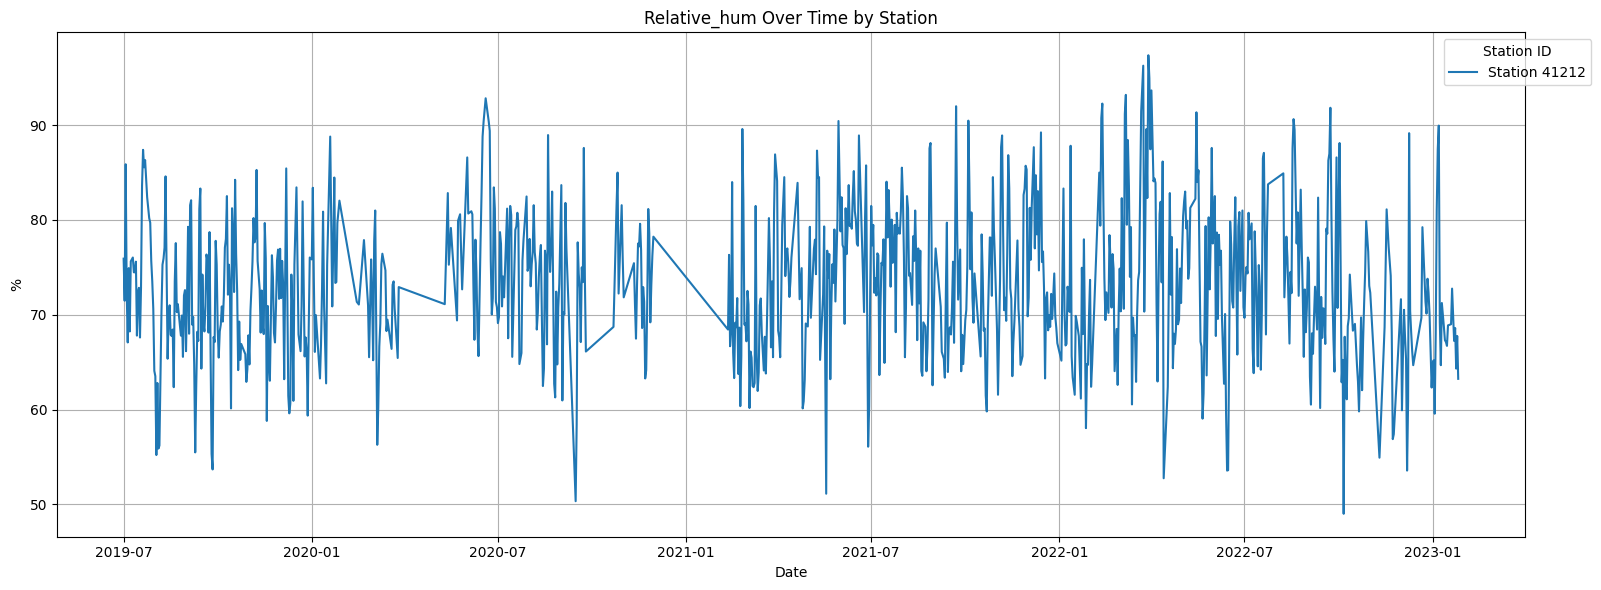

In [135]:
plot_parameter_over_time_all_stations(df_all_stations_period, parameter='relative_hum', stations_to_plot=[41212])

In [136]:
def plot_all_parameters(df, stations_to_plot=None, rows_number=None):
    
    if stations_to_plot:
        stations_to_plot = stations_to_plot
    else:
        stations_to_plot = df['station_id'].unique()

    y_feature = {
            'rain': 'mm',
            'relative_hum': '%',
            'mean_temp': '⁰C',
            'wind': 'm/s'
        }

    features = ['rain', 'relative_hum', 'mean_temp', 'wind']

    fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        for station in stations_to_plot:
            station_data = df[df['station_id'] == station].iloc[:rows_number]
            axes[i].plot(station_data['date'], station_data[feature], label=f'Station {station}')
            axes[i].set_xlabel('Date')
            axes[i].tick_params(axis='x', rotation=45)
        
        axes[i].set_ylabel(y_feature[feature])
        axes[i].set_title(f'{feature.capitalize()} Over Time')
        axes[i].grid(True)


    axes[0].legend(title='Station ID', bbox_to_anchor=(0.4, 1))
    plt.suptitle(f'Weather Parameters Over Time {rows_number} Days', fontsize=16)

    plt.show()

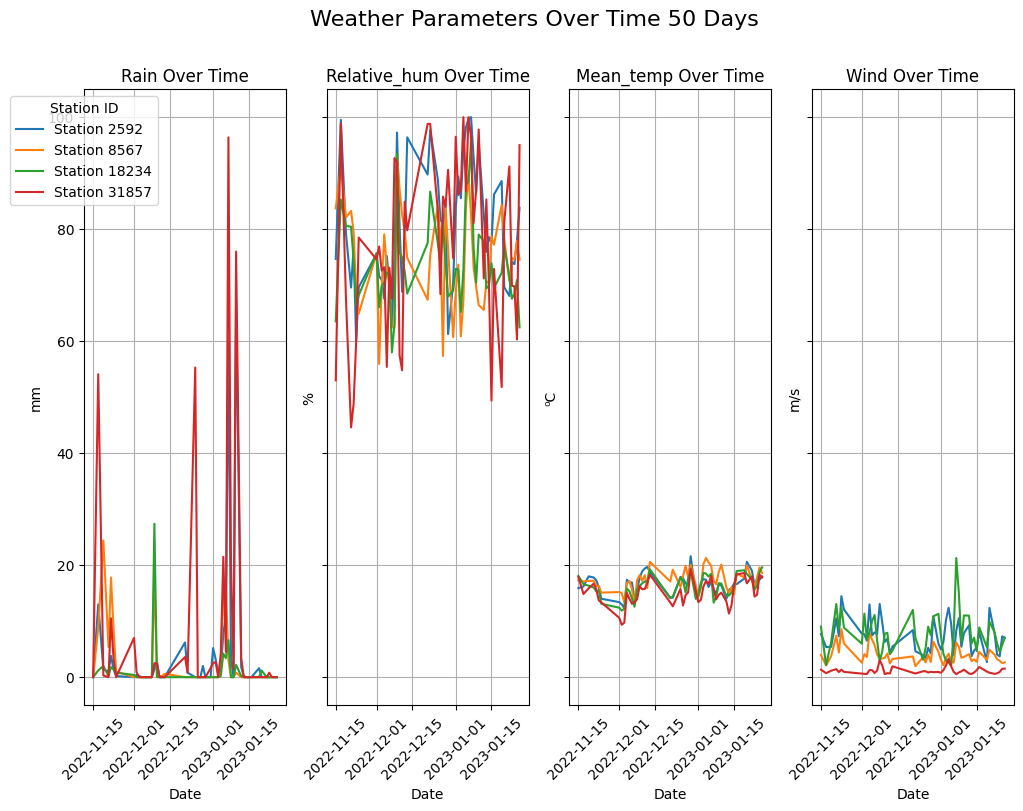

In [137]:
# stations_to_plot = [2592, 2685, 3145, 3445, 8567, 12442, 18234, 21938, 25354, 25531, 31857, 40750, 40984, 41212, 41229, 41559]
stations_to_plot = [2592, 8567, 18234, 31857]
rows_number = 50
plot_all_parameters(df_all_stations_period, stations_to_plot, rows_number)

In [ ]:

from sklearn.preprocessing import StandardScaler

print(df_all_stations_period.columns)
df_all_stations_period_scaled = df_all_stations_period[['date', 'station_id', 'rain', 'relative_hum', 'mean_temp', 'wind']]
columns_to_standardize = ['rain', 'relative_hum', 'mean_temp', 'wind']
df_all_stations_period_scaled[columns_to_standardize] = StandardScaler().fit_transform(df_all_stations_period[columns_to_standardize])
df_all_stations_period_scaled.head()

Index(['date', 'station_id', 'rain', 'relative_hum', 'mean_temp', 'wind'], dtype='object')


,date,station_id,rain,relative_hum,mean_temp,wind
0,2023-01-26 00:00:00+00:00,2592,-0.360050,0.660869,1.170213,0.646481
1,2023-01-25 00:00:00+00:00,2592,-0.360050,0.068954,1.013894,0.735216
2,2023-01-24 00:00:00+00:00,2592,-0.360050,-0.354562,1.039947,-0.396150
3,2023-01-23 00:00:00+00:00,2592,-0.360050,-0.313219,0.753362,-0.297908
4,2023-01-22 00:00:00+00:00,2592,-0.360050,-0.927318,1.430745,0.900009
...,...,...,...,...,...,...
15019,2019-07-05 00:00:00+00:00,41559,-0.174994,-0.643965,-1.130283,0.453167
15020,2019-07-04 00:00:00+00:00,41559,0.882464,0.023577,-0.981780,0.573592
15021,2019-07-03 00:00:00+00:00,41559,3.711165,1.628906,0.227088,-0.415165
15022,2019-07-02 00:00:00+00:00,41559,-0.122121,-0.589513,0.161955,-0.671861


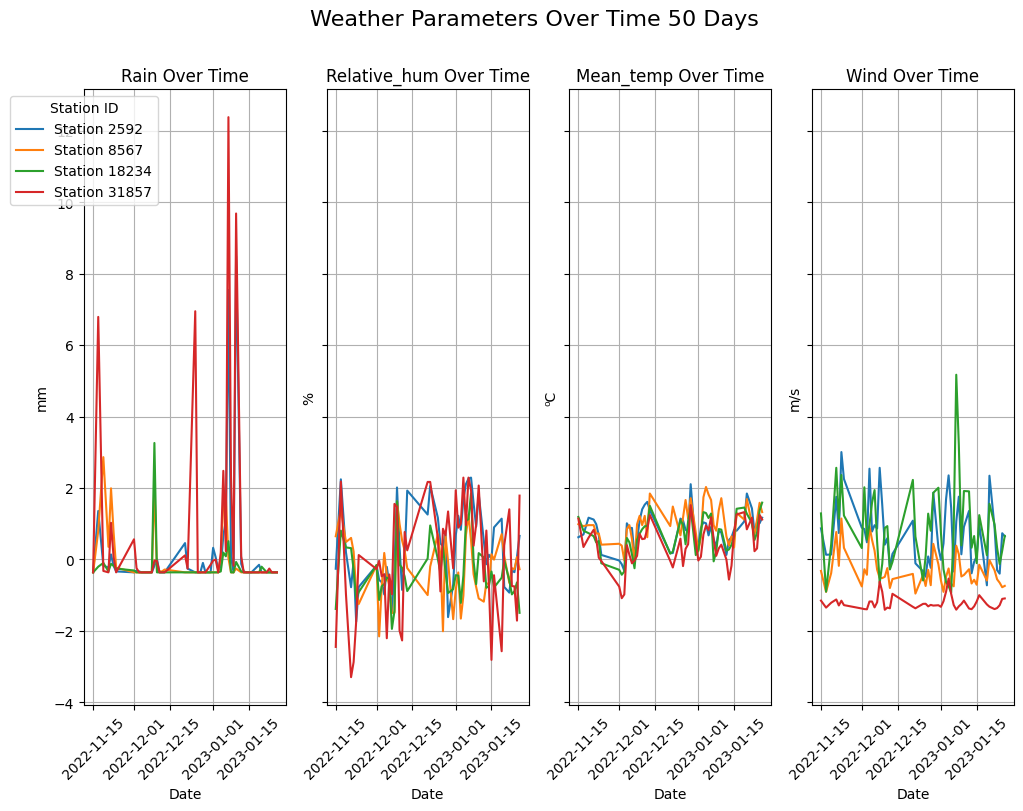

In [141]:
plot_all_parameters(df_all_stations_period_scaled, stations_to_plot, rows_number=rows_number)

In [ ]:
df_pivot = df_all_stations_period_scaled[['date', 'station_id', 'rain', 'relative_hum', 'mean_temp', 'wind']].pivot(index='station_id', columns='date')
# print(df_pivot.columns)
df_pivot.to_csv(os.path.join(BASE_DATA_PATH, r'v2_df_pivot.csv'))
display(df_pivot)

rain                            \
date       2019-07-01 00:00:00+00:00 2019-07-02 00:00:00+00:00   
station_id                                                       
2592                        -0.36005                 -0.360050   
2685                        -0.36005                 -0.360050   
3145                        -0.36005                 -0.307177   
3445                        -0.36005                 -0.360050   
8567                        -0.36005                 -0.333613   
12442                       -0.36005                 -0.333613   
18234                       -0.36005                 -0.360050   
21938                       -0.36005                 -0.360050   
25354                       -0.36005                 -0.360050   
25531                       -0.36005                 -0.148558   
31857                       -0.36005                 -0.360050   
40750                       -0.36005                 -0.333613   
40984                       -0.36005                 -0.360050   
41212                       -0.36005                 -0.360050   
41229                       -0.35344                 -0.360050   
41559                       -0.36005                 -0.122121   

                                                                \
date       2019-07-03 00:00:00+00:00 2019-07-04 00:00:00+00:00   
station_id                                                       
2592                       -0.360050                  2.072104   
2685                       -0.148558                 -0.095685   
3145                        6.249065                 -0.174994   
3445                        2.574397                  0.062934   
8567                        5.085860                 -0.201431   
12442                       5.958263                 -0.227867   
18234                       0.803155                 -0.280740   
21938                       0.168680                  0.380171   
25354                       3.631855                  0.406608   
25531                       2.865198                  0.538790   
31857                      -0.135340                  2.468651   
40750                       2.521524                  0.247989   
40984                      -0.227867                  0.882464   
41212                       1.754867                  0.221553   
41229                       0.386780                 -0.260913   
41559                       3.711165                  0.882464   

                                                                \
date       2019-07-05 00:00:00+00:00 2019-07-06 00:00:00+00:00   
station_id                                                       
2592                        0.327298                  0.089370   
2685                        0.829591                  0.168680   
3145                       -0.095685                 -0.267522   
3445                        0.076152                 -0.148558   
8567                       -0.042812                 -0.227867   
12442                      -0.042812                 -0.254304   
18234                      -0.333613                 -0.148558   
21938                       0.776718                  0.142243   
25354                       0.089370                 -0.069249   
25531                      -0.148558                 -0.174994   
31857                       2.759452                  0.578445   
40750                       1.464066                  0.168680   
40984                       0.327298                 -0.148558   
41212                       0.274425                  0.036497   
41229                      -0.227867                 -0.300567   
41559                      -0.174994                  0.406608   

                                                                \
date       2019-07-07 00:00:00+00:00 2019-07-08 00:00:00+00:00   
station_id                                                       
2592                       -0.360050                 -0.360050   
268